In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import arviz as az
import numpy as np
import glob, os
import patsy
from random import sample
import pickle

data = pd.read_csv('../dataHDDM.csv')
data = data[data.exp == "one"]#Taking data of experiment 1 from previou
data["rt"] = np.abs(data.rt) #I wrongly flipped errors in data prep file
data['participant'] = [x.split('_')[0] for x in data.subj_idx]
#data['correctness'] = data.response
data['contraste'] = data.contrast.replace(np.sort(data.contrast.unique()), np.arange(5)+1)
del data['contrast']
data['stimulus'] = data.apply(lambda row : 'right' if row['stim'] == 'Right' else 'left', axis=1)
data['response'] = data.apply(lambda row : 1 if row['response'] == 'Right' else 0, axis=1)
data['SAT'] = data.apply(lambda row : 'accuracy' if row['SAT'] == 'Accuracy' else 'speed', axis=1)
#data['correctness'] = data.apply(lambda row : 1 if row['response'] == row['stim'] else 0, axis=1)

## Fitting Model on RT

Running script DDMfiles/DDMfit.py to generate estimated parameters (extremely slow, cell after this one collects results)

In [3]:
Fastdm_data = data[["participant","contraste","SAT","response","rt","stimulus"]].copy()
Fastdm_data = Fastdm_data.rename(columns = {'rt':'RT'})
Fastdm_data['contrast'] = Fastdm_data.contraste.astype(int)
Fastdm_data.response = Fastdm_data.response.astype(int)

import glob,os
precision = 3
method = 'ks'#You can switch with ml, cs or ks

Free = {
    't0':['SAT'],
    'a':['SAT'],
    'v':['stimulus','contrast','SAT'],
    'szr':['SAT'],}

Fixed = {'p':0,
         'd':0}

os.chdir('DDMfiles/')
import FDM_functions_SATTM as fdm
fdm.generate_files(Fastdm_data, free = Free, fixed = Fixed, method=method, precision=precision)

fdm.fit(nproc=16)

pars = fdm.get_parameters()

pars.to_csv('fit_results_RT.csv')

for f in glob.glob("*.ctl"):
    os.remove(f)
    
for f in glob.glob("*.lst"):
    os.remove(f)
    
for f in glob.glob("data_*.csv"):
    os.remove(f)
os.chdir('../')

Proceeding experiment_S12.ctlProceeding experiment_S6.ctlProceeding experiment_S1.ctlProceeding experiment_S2.ctl
Proceeding experiment_S3.ctlProceeding experiment_S5.ctlProceeding experiment_S4.ctlProceeding experiment_S14.ctlProceeding experiment_S13.ctl
Proceeding experiment_S8.ctl


Proceeding experiment_S7.ctl



/home/gabriel/anaconda3/envs/pystan/lib/python3.8/subprocess.py:844: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)


/home/gabriel/anaconda3/envs/pystan/lib/python3.8/subprocess.py:844: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)
/home/gabriel/anaconda3/envs/pystan/lib/python3.8/subprocess.py:844: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)
/home/gabriel/anaconda3/envs/pystan/lib/python3.8/subprocess.py:844: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)


Proceeding experiment_S9.ctl


/home/gabriel/anaconda3/envs/pystan/lib/python3.8/subprocess.py:844: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)
/home/gabriel/anaconda3/envs/pystan/lib/python3.8/subprocess.py:844: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)
/home/gabriel/anaconda3/envs/pystan/lib/python3.8/subprocess.py:844: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)


/home/gabriel/anaconda3/envs/pystan/lib/python3.8/subprocess.py:844: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)


/home/gabriel/anaconda3/envs/pystan/lib/python3.8/subprocess.py:844: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)
/home/gabriel/anaconda3/envs/pystan/lib/python3.8/subprocess.py:844: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)
/home/gabriel/anaconda3/envs/pystan/lib/python3.8/subprocess.py:844: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)


Proceeding experiment_S11.ctlProceeding experiment_S10.ctl



/home/gabriel/anaconda3/envs/pystan/lib/python3.8/subprocess.py:844: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)
/home/gabriel/anaconda3/envs/pystan/lib/python3.8/subprocess.py:844: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)
/home/gabriel/anaconda3/envs/pystan/lib/python3.8/subprocess.py:844: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)


## Fitting DDM on PMT

In [13]:
Fastdm_data = data[["participant","contraste","SAT","response","rt","mt","stimulus"]].copy()
Fastdm_data.rt = Fastdm_data.rt - Fastdm_data.mt
Fastdm_data = Fastdm_data.rename(columns = {'rt':'RT'})
Fastdm_data['contrast'] = Fastdm_data.contraste.astype(int)
Fastdm_data.response = Fastdm_data.response.astype(int)

import glob,os
precision = 3
method = 'ks'#You can switch with ml, cs or ks

Free = {
    't0':['SAT'],
    'a':['SAT'],
    'v':['stimulus','contrast','SAT'],
    'szr':['SAT'],}

Fixed = {'p':0,
         'd':0}

os.chdir('DDMfiles/')
import FDM_functions_SATTM as fdm
fdm.generate_files(Fastdm_data, free = Free, fixed = Fixed, method=method, precision=precision)

fdm.fit(nproc=16)

pars = fdm.get_parameters()

pars.to_csv('fit_results_PMT.csv')

for f in glob.glob("*.ctl"):
    os.remove(f)
    
for f in glob.glob("*.lst"):
    os.remove(f)
    
for f in glob.glob("data_*.csv"):
    os.remove(f)
os.chdir('../')

Proceeding experiment_S6.ctlProceeding experiment_S12.ctlProceeding experiment_S1.ctlProceeding experiment_S2.ctlProceeding experiment_S10.ctlProceeding experiment_S11.ctl

Proceeding experiment_S7.ctlProceeding experiment_S9.ctl

/home/gabriel/anaconda3/envs/pystan/lib/python3.8/subprocess.py:844: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)



Proceeding experiment_S4.ctl

Proceeding experiment_S5.ctl
Proceeding experiment_S3.ctl
Proceeding experiment_S8.ctl


/home/gabriel/anaconda3/envs/pystan/lib/python3.8/subprocess.py:844: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)


Proceeding experiment_S13.ctlProceeding experiment_S14.ctl




/home/gabriel/anaconda3/envs/pystan/lib/python3.8/subprocess.py:844: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)
/home/gabriel/anaconda3/envs/pystan/lib/python3.8/subprocess.py:844: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)


/home/gabriel/anaconda3/envs/pystan/lib/python3.8/subprocess.py:844: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)


/home/gabriel/anaconda3/envs/pystan/lib/python3.8/subprocess.py:844: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)
/home/gabriel/anaconda3/envs/pystan/lib/python3.8/subprocess.py:844: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)
/home/gabriel/anaconda3/envs/pystan/lib/python3.8/subprocess.py:844: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)
/home/gabriel/anaconda3/envs/pystan/lib/python3.8/subprocess.py:844: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)
/home/gabriel/anaconda3/envs/pystan/lib/python3.8/subprocess.py:844: Runtime

/home/gabriel/anaconda3/envs/pystan/lib/python3.8/subprocess.py:844: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)
/home/gabriel/anaconda3/envs/pystan/lib/python3.8/subprocess.py:844: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)
/home/gabriel/anaconda3/envs/pystan/lib/python3.8/subprocess.py:844: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)


## Fitting DDM on RT with the $d$ parameter

In [ ]:
Fastdm_data = data[["participant","contraste","SAT","response","rt","stimulus"]].copy()
Fastdm_data = Fastdm_data.rename(columns = {'rt':'RT'})
Fastdm_data['contrast'] = Fastdm_data.contraste.astype(int)
Fastdm_data.response = Fastdm_data.response.astype(int)

import glob,os
precision = 3
method = 'ks'#You can switch with ml, cs or ks

Free = {
    't0':['SAT'],
    'a':['SAT'],
    'v':['stimulus','contrast','SAT'],
    'szr':['SAT'],}

Fixed = {'p':0}

os.chdir('DDMfiles/')
import FDM_functions_SATTM as fdm
fdm.generate_files(Fastdm_data, free = Free, fixed = Fixed, method=method, precision=precision)

fdm.fit(nproc=16)

pars = fdm.get_parameters()

pars.to_csv('fit_results_wd.csv')

for f in glob.glob("*.ctl"):
    os.remove(f)
    
for f in glob.glob("*.lst"):
    os.remove(f)
    
for f in glob.glob("data_*.csv"):
    os.remove(f)
os.chdir('../')

Proceeding experiment_S4.ctlProceeding experiment_S7.ctlProceeding experiment_S6.ctlProceeding experiment_S14.ctlProceeding experiment_S10.ctlProceeding experiment_S2.ctlProceeding experiment_S9.ctlProceeding experiment_S13.ctlProceeding experiment_S12.ctlProceeding experiment_S5.ctl






## REcovering parameters from the three fits

In [4]:
fit = pd.read_csv('DDMfiles/fit_results_RT.csv')
params = []
for xx, subj_dat in fit.groupby(['participant']): 
    zr = subj_dat.loc[subj_dat['parameter']=='zr'].value.mean()
    st0 = subj_dat.loc[subj_dat['parameter']=='st0'].value.values[0]
    fit = subj_dat.fit.mean()
    for SAT, SAT_dat in subj_dat.groupby('SAT'):
        a = SAT_dat.loc[SAT_dat['parameter']=='a'].value.values[0]
        t0 = SAT_dat.loc[SAT_dat['parameter']=='t0'].value.values[0]
        for contrastXstim, c_dat in SAT_dat.groupby(['contrast','stimulus']):
            v = c_dat.loc[c_dat['parameter']=='v'].value.values[0]
            params.append([a, v, zr, t0, st0, xx, contrastXstim[0], SAT, contrastXstim[1],fit])
        
summary_RT = pd.DataFrame(params, columns=['a', 'v', 'zr', 't0', 'st0', 'participant','contrast','SAT','stimulus','fit'])
summary_RT.to_csv('summar_RT.csv')

In [5]:
fit = pd.read_csv('DDMfiles/fit_results_PMT.csv')
params = []
for xx, subj_dat in fit.groupby(['participant']): 
    zr = subj_dat.loc[subj_dat['parameter']=='zr'].value.mean()
    st0 = subj_dat.loc[subj_dat['parameter']=='st0'].value.values[0]
    fit = subj_dat.fit.mean()
    for SAT, SAT_dat in subj_dat.groupby('SAT'):
        a = SAT_dat.loc[SAT_dat['parameter']=='a'].value.values[0]
        t0 = SAT_dat.loc[SAT_dat['parameter']=='t0'].value.values[0]
        for contrastXstim, c_dat in SAT_dat.groupby(['contrast','stimulus']):
            v = c_dat.loc[SAT_dat['parameter']=='v'].value.values[0]
            params.append([a, v, zr, t0, st0, xx, contrastXstim[0], SAT, contrastXstim[1], fit])
        
summary_PMT = pd.DataFrame(params, columns=['a', 'v', 'zr', 't0', 'st0', 'participant','contrast','SAT','stimulus', 'fit'])


In [6]:
fit = pd.read_csv('DDMfiles/fit_results_RT_wd.csv')
params = []
for xx, subj_dat in fit.groupby(['participant']): 
    zr = subj_dat.loc[subj_dat['parameter']=='zr'].value.mean()
    st0 = subj_dat.loc[subj_dat['parameter']=='st0'].value.values[0]
    d = subj_dat.loc[subj_dat['parameter']=='d'].value.values[0]
    fit = subj_dat.fit.mean()
    for SAT, SAT_dat in subj_dat.groupby('SAT'):
        a = SAT_dat.loc[SAT_dat['parameter']=='a'].value.values[0]
        t0 = SAT_dat.loc[SAT_dat['parameter']=='t0'].value.values[0]
        for contrastXstim, c_dat in SAT_dat.groupby(['contrast','stimulus']):
            v = c_dat.loc[SAT_dat['parameter']=='v'].value.values[0]
            params.append([a, v, zr, t0, st0, d, xx.split('_')[1], contrastXstim[0], SAT, contrastXstim[1], fit])
        
summary_RT_wd = pd.DataFrame(params, columns=['a', 'v', 'zr', 't0', 'st0', 'd', 'participant','contrast','SAT','stimulus', 'fit'])


### Comparing starting points

In [44]:
zr = summary_RT.groupby('participant').mean().zr.reset_index()
zr = zr.append(summary_RT_wd.groupby('participant').mean().zr.reset_index())
zr = zr.append(summary_PMT.groupby('participant').mean().zr.reset_index())
zr['Fit'] = np.concatenate([np.repeat('RT', 14),np.repeat(r'$d$', 14),np.repeat('PMT', 14)])
zr['participant'] = zr.participant.replace(summary_RT.groupby('participant').mean().zr.reset_index().participant.values, summary_RT_wd.groupby('participant').mean().zr.reset_index().participant.values)

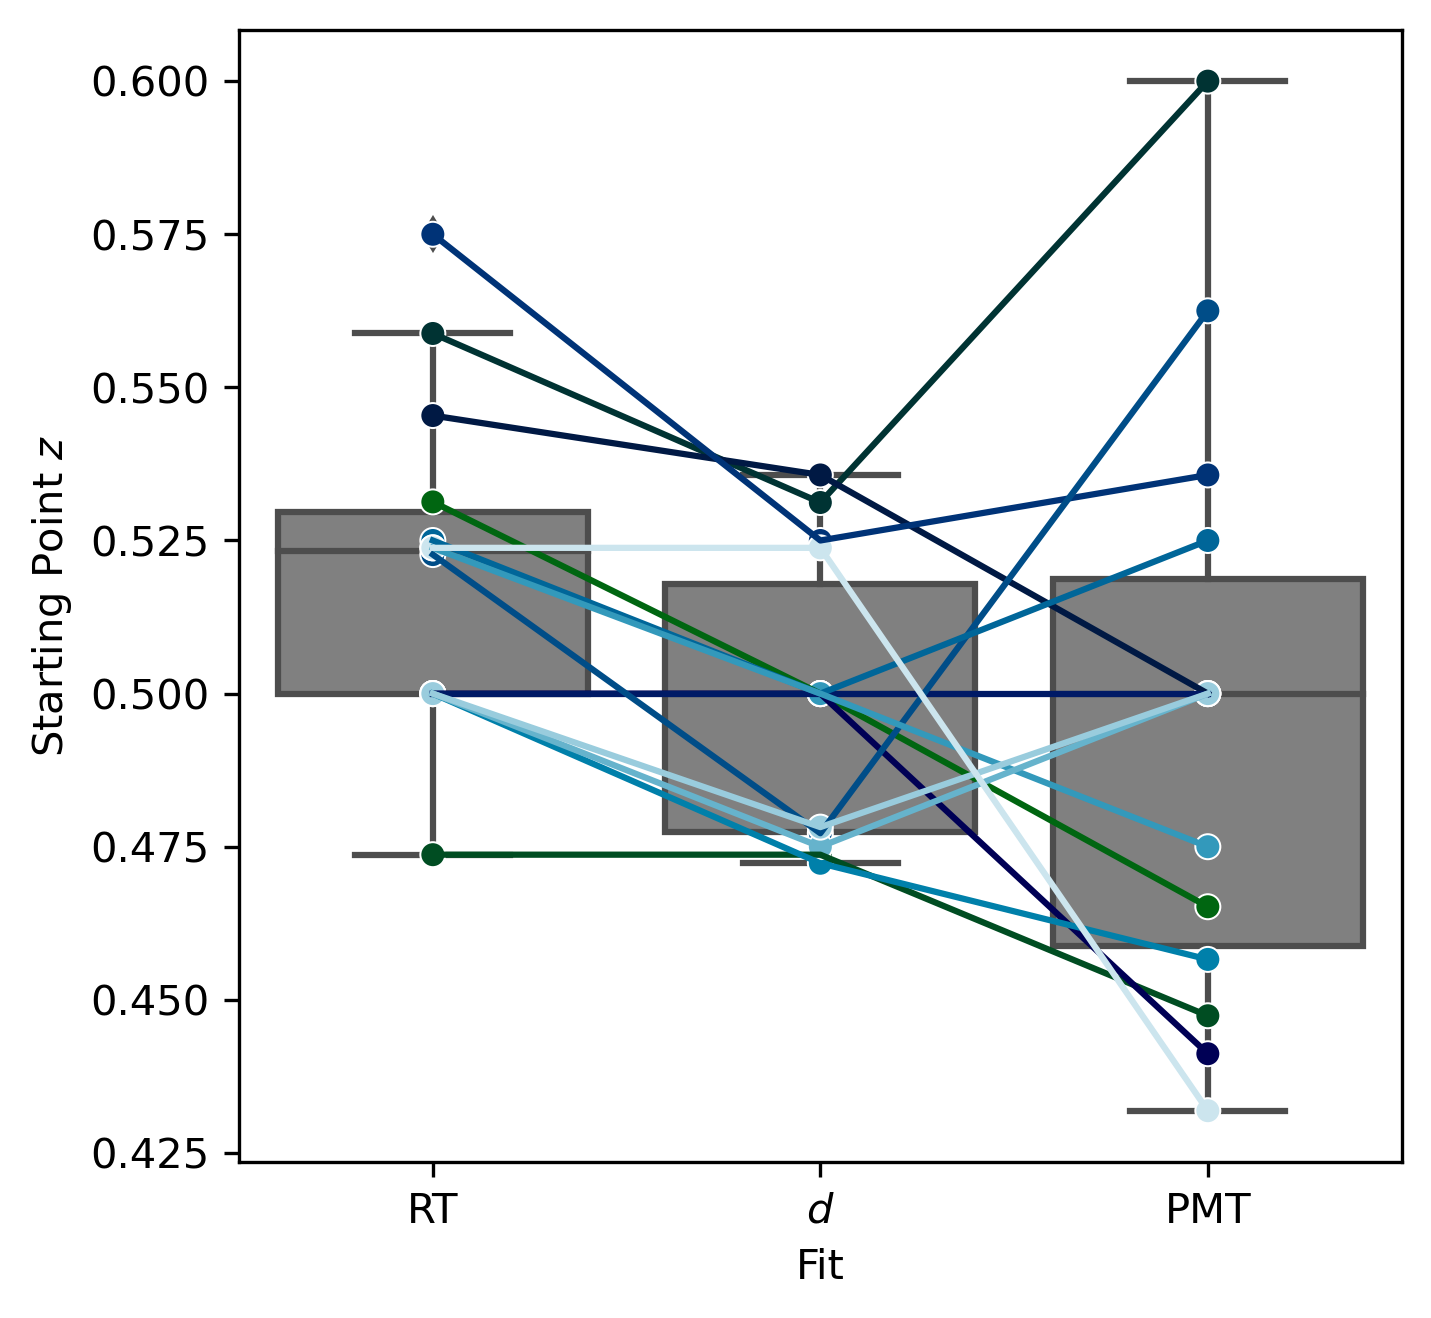

In [45]:
plt.figure(figsize=(5,5),dpi=300)
sns.boxplot(x="Fit", y="zr", data=zr, palette=["grey","grey","grey"])
sns.lineplot(x="Fit", y="zr", hue="participant",data=zr,legend=False,alpha=1,zorder=10,palette="ocean")
sns.scatterplot(x="Fit", y="zr", hue="participant",data=zr,legend=False,alpha=1,zorder=10,palette="ocean")
plt.ylabel(r'Starting Point $z$')
plt.savefig('Bias.png', bbox_inches='tight')

Comparing fit statistics

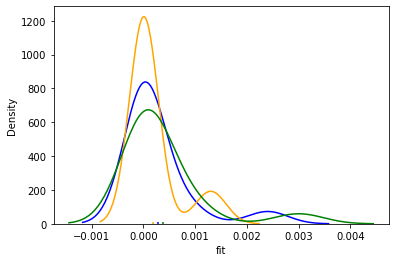

In [24]:
sns.kdeplot(summary_RT.groupby('participant').fit.mean(), color="b")
plt.vlines(np.mean(summary_RT.groupby('participant').fit.mean()), 0, 12, color="b")
sns.kdeplot(summary_PMT.groupby('participant').fit.mean(), color="orange")
plt.vlines(np.mean(summary_PMT.groupby('participant').fit.mean()), 0, 12, color="orange")
sns.kdeplot(summary_RT_wd.groupby('participant').fit.mean(), color="g")
plt.vlines(np.mean(summary_RT_wd.groupby('participant').fit.mean()), 0, 12, color="g")

plt.show()

Comparing $d$ parameter with the $MT$ difference

In [27]:
diff = data[(data.response == 0)].groupby(['participant']).mean().mt - data[(data.response == 1)].groupby(['participant']).mean().mt
diff = diff.reset_index()
diff['predicted'] = summary_RT_wd.groupby('participant').d.mean().values #participant index is the same between both
diff['zr'] = summary_RT.groupby('participant').zr.mean().values
diff.to_csv('diff.csv')


In [14]:
diff

,participant,mt,predicted,zr
0,S1,0.025016,0.0067,0.5313
1,S10,0.019314,-0.0018,0.4737
2,S11,0.007809,0.0295,0.5588
3,S12,0.018821,0.0113,0.5454
4,S13,0.024493,0.0035,0.5000
5,S14,0.000976,0.0035,0.5000
6,S2,0.011953,0.0230,0.5750
7,S3,0.006246,0.0300,0.5227
8,S4,0.012673,0.0178,0.5250
9,S5,0.022874,0.0104,0.5000


[[ 1.         -0.49095759]
 [-0.49095759  1.        ]]


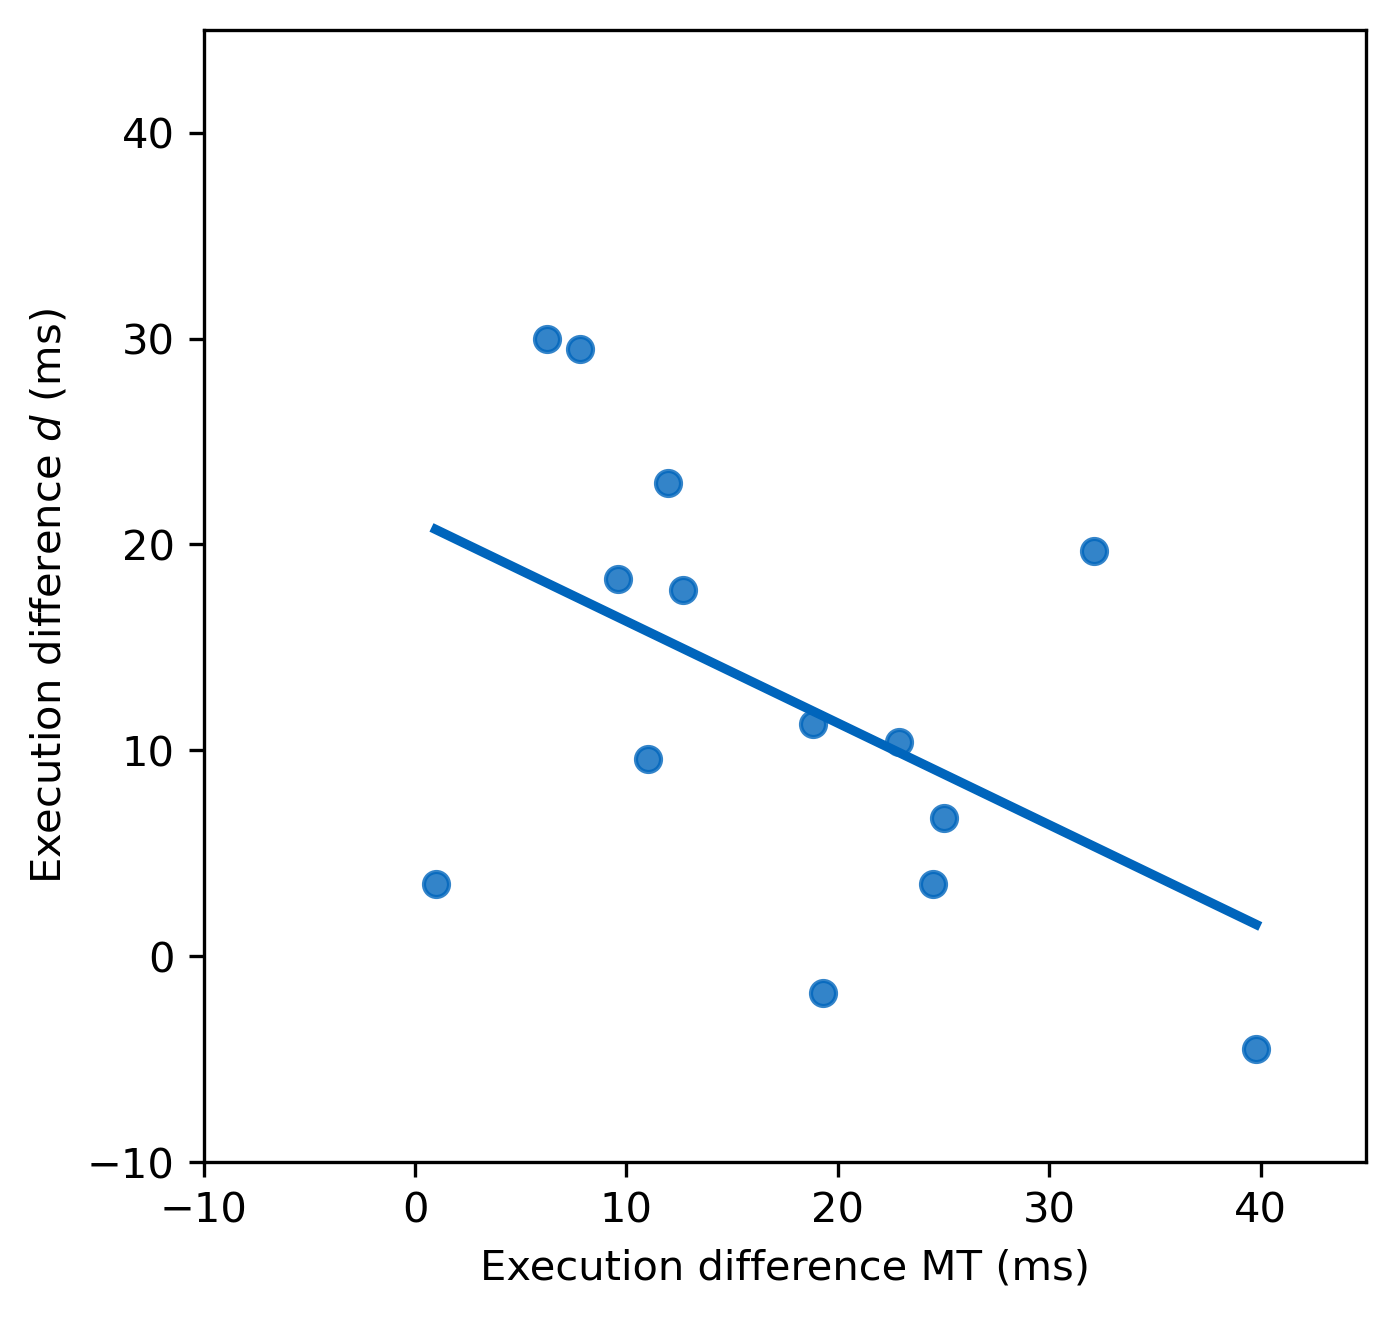

In [31]:
plt.figure(figsize=(5,5), dpi=300)
sns.regplot(x="mt", y="predicted", data=diff*1000, ci=False, color=[0/256, 101/256, 189/256])
plt.ylabel('Execution difference $d$ (ms)')
plt.xlabel('Execution difference MT (ms)')
plt.xlim(-10,45)
plt.ylim(-10,45)
print(np.corrcoef(diff.mt, diff.predicted))
plt.savefig('corrMTd.png', bbox_inches='tight')
plt.show()


In [19]:
print(np.mean(diff['predicted']))
print(np.std(diff['predicted']))

0.012642857142857141
0.010427211261592313


In [20]:
print(np.mean(diff['mt']))
print(np.std(diff['mt']))

0.017334566610919318
0.010358493587286879
